In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = 'image4.jpg'

In [3]:
image = cv2.imread(image_path) ## Return numpy array in BGR Format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) ## Return numpy array in RGB Format 

Detect all coins in the image
* Use edge detection, to detect all coins in the image.
* Visualize the detected coins by outlining them in the image.

In [4]:
def showImage(image, type=None):
    plt.imshow(image, cmap=type)
    plt.show()

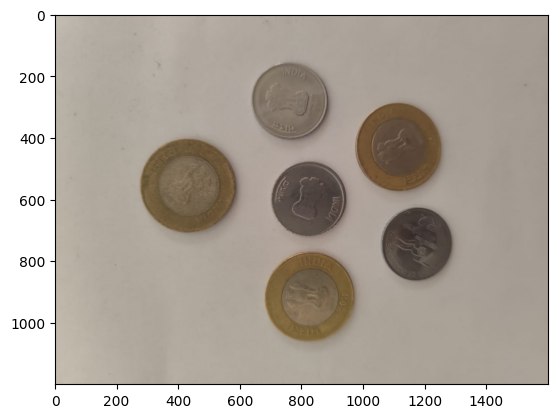

In [5]:
showImage(image_rgb)

In [6]:
def sobel(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
    return sobel_combined

In [30]:
def overlay_edges_on_grayscale(base_gray, edge_img):
    base_color = cv2.cvtColor(base_gray, cv2.COLOR_GRAY2BGR)
    mask = edge_img > 0
    combined = base_color.copy()
    combined[mask] = [0, 255, 0]
    return combined

In [35]:
def detectEdge(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(grayscale, (13, 13), 0)
    sobel_combined = sobel(blurred)
    normalized_img = cv2.normalize(grayscale, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    _, thresh = cv2.threshold(normalized_img, 150, 255, cv2.THRESH_BINARY)
    canny_edges = cv2.Canny(thresh, 0, 120)
    blended = cv2.addWeighted(grayscale, 0.5, canny_edges, 1, 0)
    titles = ["Original Image", "Grayscale Image", "Blurred Image", "Sobel Edge Detection", "Canny Edge Detection", "Blended"]
    images = [image_rgb, grayscale, blurred, sobel_combined, canny_edges, blended]
    cmap_options = [None, 'gray', 'gray', 'gray', 'gray', 'gray']
    
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(3, 2, i+1)
        plt.imshow(images[i], cmap=cmap_options[i])
        plt.title(titles[i])
    
    plt.tight_layout()
    plt.show()

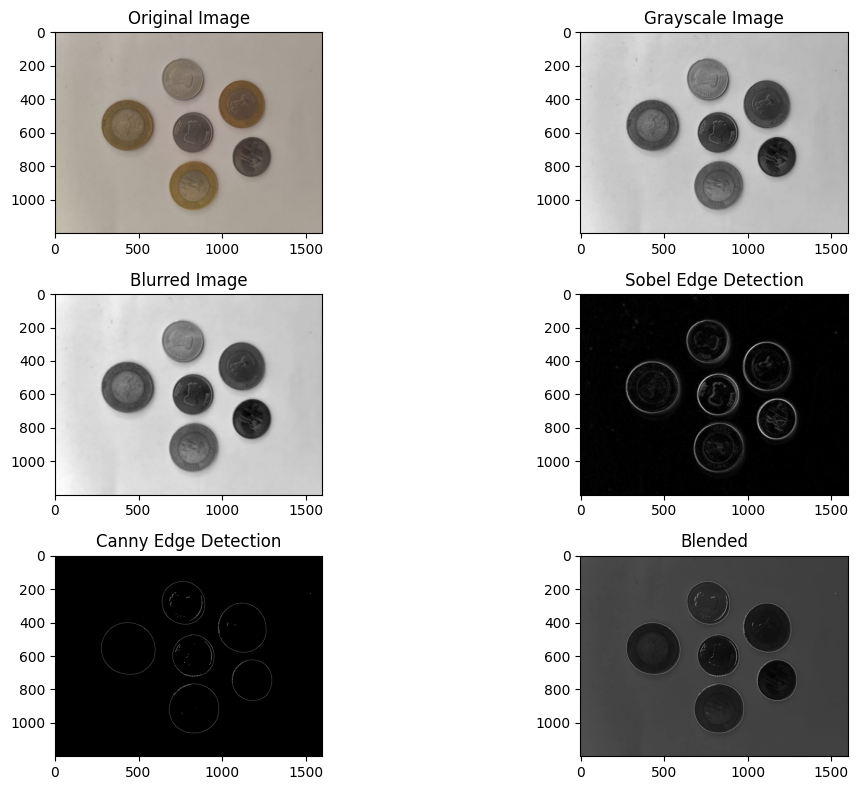

In [36]:
detectEdge(image_path)

Segmentation of Each Coin
* Apply region-based segmentation techniques to isolate individual coins from the image.
* Provide segmented outputs for each detected coin.

In [9]:
def segment(image_path):
    image = cv2.imread(image_path) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    normalized_img = cv2.normalize(gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    blurred = cv2.GaussianBlur(normalized_img, (13, 13), 0)
    _, thresh = cv2.threshold(blurred, 140, 255, cv2.THRESH_BINARY)
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(thresh, cmap='gray')
    plt.title("Segmented Image")
    plt.show()

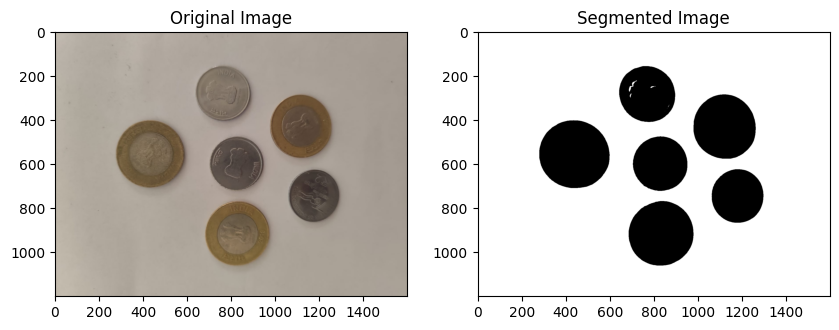

In [10]:
segment(image_path)

Count the Total Number of Coins
* Write a function to count the total number of coins detected in the image.
* Display the final count as an output.

In [11]:
def countCoins(image_path):
    image = cv2.imread(image_path) 
    resized_image = cv2.resize(image, (1024, 1024), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    normalized_img = cv2.normalize(gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    blurred = cv2.GaussianBlur(normalized_img, (13, 13), 0)
    _, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)
    thresh_inverted = cv2.bitwise_not(thresh)
    contours_corrected, _ = cv2.findContours(thresh_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours_corrected = [cnt for cnt in contours_corrected if cv2.contourArea(cnt) > 2000]
    num_coins_final = len(filtered_contours_corrected)
    output_corrected = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    print(f"Total no of Coins in Image : {len(filtered_contours_corrected)}")
    for cnt in filtered_contours_corrected:
        x, y, w, h = cv2.boundingRect(cnt) 
        cv2.rectangle(output_corrected, (x, y), (x + w, y + h), (0, 255, 0), 3) 

    plt.figure(figsize=(8, 6))
    plt.imshow(output_corrected, cmap='gray')
    plt.title(f"Number of Coins: {len(filtered_contours_corrected)}")
    plt.axis("off")
    plt.show()

Total no of Coins in Image : 6


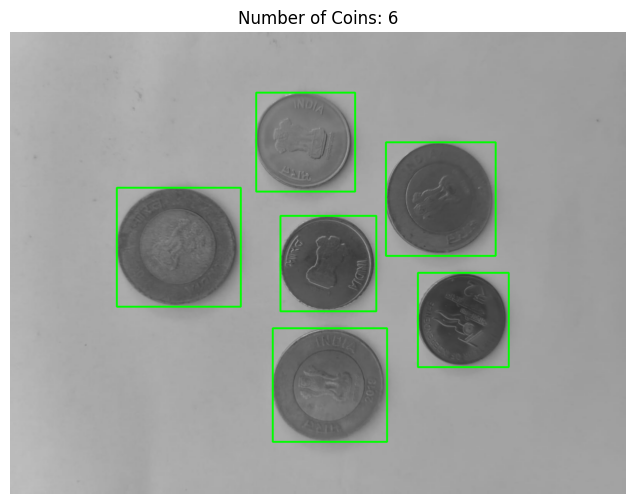

In [12]:
countCoins(image_path)